In [1]:
import os
gpu=int(input("Which gpu number you would like to allocate:"))
os.environ["CUDA_VISIBLE_DEVICES"]=str(gpu)



Which gpu number you would like to allocate:0


In [2]:
import numpy as np
import random
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer 
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import time

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K
# !pip install fl_implementation_utils

# from fl_implementation_utils import *

In [73]:
# def create_clients(data_list, label_list, num_clients=3, initial='clients'):
#     ''' return: a dictionary with keys clients' names and value as 
#                 data shards - tuple of datas and label lists.
#         args: 
#             data_list: a list of numpy arrays of training data
#             label_list:a list of binarized labels for each data
#             num_client: number of fedrated members (clients)
#             initials: the clients'name prefix, e.g, clients_1 
            
#     '''

#     #create a list of client names
#     client_names = ['{}_{}'.format(initial, i+1) for i in range(num_clients)]

#     #randomize the data
#     data = list(zip(data_list, label_list))
#     random.shuffle(data)

#     #shard data and place at each client
#     size = len(data)//num_clients
#     shards = [data[i:i + size] for i in range(0, size*num_clients, size)]

#     #number of clients must equal number of shards
#     assert(len(shards) == len(client_names))

#     return {client_names[i] : shards[i] for i in range(len(client_names))}

def create_clients(data_dict):
    '''
    Return a dictionary with keys as client names and values as data and label lists.
    
    Args:
        data_dict: A dictionary where keys are client names, and values are tuples of data and labels.
                    For example, {'client_1': (data_1, labels_1), 'client_2': (data_2, labels_2), ...}
    
    Returns:
        A dictionary with keys as client names and values as tuples of data and label lists.
    '''
    return data_dict


In [74]:
# def batch_data(data_shard, bs=32):
#     '''Takes in a clients data shard and create a tfds object off it
#     args:
#         shard: a data, label constituting a client's data shard
#         bs:batch size
#     return:
#         tfds object'''
#     #seperate shard into data and labels lists
#     data, label = zip(*data_shard)
#     dataset = tf.data.Dataset.from_tensor_slices((list(data), list(label)))
#     return dataset.shuffle(len(label)).batch(bs)



In [75]:
# class SimpleMLP:
#     @staticmethod
#     def build():
#         base_model = tf.keras.applications.ResNet101V2(include_top=False, weights=None, input_shape=(128, 128, 3))
# # Freeze the base model's layers
#         base_model.trainable = True

# # Create the transfer learning model by adding custom classification layers on top of the base model
#         model2 = tf.keras.models.Sequential([
#     base_model,
#     tf.keras.layers.GlobalAveragePooling2D(),
            
#     tf.keras.layers.Dense(512,activation='relu'),
            
# #     tf.keras.layers.Dense(128,activation='relu'),        
#     tf.keras.layers.Dense(5, activation='softmax')  # Adjust the number of output classes accordingly
# ])

# # Compile the model
#         model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
#         return model2

In [76]:

def test_model(X_test, Y_test,  model, comm_round):
#     cce = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
    #logits = model.predict(X_test, batch_size=100)
#     logits = model.predict(X_test)
    #print(logits)
    loss,accuracy=model.evaluate(X_test,Y_test)
#     loss = cce(Y_test, logits)
#     acc = accuracy_score( tf.argmax(Y_test, axis=1),tf.argmax(logits, axis=1))
    print('comm_round: {} | global_acc: {:.3%} | global_loss: {}'.format(comm_round, accuracy, loss))
    return accuracy, loss

In [77]:
# def weight_scalling_factor(clients_trn_data, client_name):
#     client_names = list(clients_trn_data.keys())
#     #get the bs
#     bs = list(clients_trn_data[client_name])[0][0].shape[0]
#     #first calculate the total training data points across clinets
#     global_count = sum([tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy() for client_name in client_names])*bs
#     # get the total number of data points held by a client
#     local_count = tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy()*bs
#     return local_count/global_count


# def scale_model_weights(weight, scalar):
#     '''function for scaling a models weights'''
#     weight_final = []
#     steps = len(weight)
#     for i in range(steps):
#         weight_final.append(scalar * weight[i])
#     return weight_final

import tensorflow as tf

def avg_weights(scaled_weight_list):
    '''Return the average of the listed scaled weights.'''
    num_clients = len(scaled_weight_list)
    
    if num_clients == 0:
        return None  # Handle the case where the list is empty
        
    avg_grad = list()
    
    # Get the sum of gradients across all client gradients
    for grad_list_tuple in zip(*scaled_weight_list):
        layer_mean = tf.math.reduce_sum(grad_list_tuple, axis=0) / num_clients
        avg_grad.append(layer_mean)
        
    return avg_grad


In [78]:
import numpy as np
train1=np.load("train1u.npy")
label1=np.load("label1u.npy")
train2=np.load("train2u.npy")
label2=np.load("label2u.npy")
train3=np.load("train3u.npy")
label3=np.load("label3u.npy")
print("import sucessfull")

import sucessfull


In [22]:
test1=np.load("test1.npy")
one_hot_labels1=np.load("one_hot_labels1.npy")
test2=np.load("test2.npy")
one_hot_labels2=np.load("one_hot_labels2.npy")
test3=np.load("test3.npy")
one_hot_labels3=np.load("one_hot_labels3.npy")
print("import sucessfull")

import sucessfull


In [79]:
test=np.load("test.npy")
one_hot_labels=np.load("one_hot_labels.npy")

In [80]:
test=test/255

In [45]:
#process and batch the test set  
# test_batched = tf.data.Dataset.from_tensor_slices((test, one_hot_labels)).batch(len(one_hot_labels))
# one_hot_labels.shape

In [13]:
# print(train1.shape)
# print(label1.shape)
# print(train2.shape)
# print(label2.shape)
# print(train3.shape)
# print(label3.shape)


In [81]:
client_data = {
    'client_1': (train1, label1),
    'client_2': (train2, label2),
    'client_3': (train3, label3)
}
#create clients
clients_batched = create_clients(client_data)

In [17]:
# clients_batched['client_1']

In [82]:
#initialize global model
#print(data_list.shape,labels)
# smlp_global = SimpleMLP()
# global_model = smlp_global.build()
        

In [83]:
global_model.summary()

Model: "Inception_v4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 63, 63, 32)   896         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 63, 63, 32)  128         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

In [49]:
# len(clients_batched[client][1])
# global_model.get_weights()
client_names = list(clients_batched.keys())
client_names

['client_1', 'client_2', 'client_3']

In [21]:
# clients_batched

In [85]:
comms_round = 50  # Number of global epochs
acc3 = []

for comm_round in range(comms_round):

    # Get the global model's weights - will serve as the initial weights for all local models
    global_weights = global_model.get_weights()

    # Initial list to collect local model weights after scaling
    local_weight_list = []

#     Randomize client data - using keys
    client_names = list(clients_batched.keys())
#     random.shuffle(client_names)

    for client in tqdm(client_names, desc='Progress Bar'):

        model1=SEInception(128,128,3,64)
        local_model=model1.SEInception_v4()

        local_model.compile(
            loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy']
        )

        # Set local model weight to the weight of the global model
        local_model.set_weights(global_weights)

        # Fit local model with client's data
        local_model.fit(
            np.array(clients_batched[client][0]),
            np.array(clients_batched[client][1]),
            epochs=2,
            batch_size=32,
            verbose=2
        )

        # Get the scaled model weights and add to the list
        weights = local_model.get_weights()
        local_weight_list.append(weights)

        # Clear the session to free memory after each communication round
        K.clear_session()

    # Calculate the average weights across all clients for each layer
    average_weights = avg_weights(local_weight_list)

    # Update the global model with the average weights
    global_model.set_weights(average_weights)

    # Test the global model and print out metrics after each communications round
#     for (X_test, Y_test) in test_batched:
    global_acc, global_loss = test_model(test, one_hot_labels, global_model, comm_round)
    acc3.append(global_acc)


Progress Bar:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/2
814/814 - 114s - loss: 0.6526 - accuracy: 0.7870 - 114s/epoch - 140ms/step
Epoch 2/2
814/814 - 98s - loss: 0.3551 - accuracy: 0.9052 - 98s/epoch - 120ms/step


Progress Bar:  33%|███▎      | 1/3 [03:40<07:21, 220.64s/it]

Epoch 1/2


2023-09-12 10:17:10.289264: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 50s - loss: 0.8442 - accuracy: 0.7002 - 50s/epoch - 158ms/step
Epoch 2/2
315/315 - 36s - loss: 0.4774 - accuracy: 0.8623 - 36s/epoch - 113ms/step


Progress Bar:  67%|██████▋   | 2/3 [05:11<02:24, 144.17s/it]

Epoch 1/2
159/159 - 34s - loss: 0.6982 - accuracy: 0.7967 - 34s/epoch - 216ms/step
Epoch 2/2
159/159 - 19s - loss: 0.3798 - accuracy: 0.8927 - 19s/epoch - 121ms/step


Progress Bar: 100%|██████████| 3/3 [06:08<00:00, 122.95s/it]


32/32 [==============================] - 5s 43ms/step - loss: 1.9396 - accuracy: 0.2000
comm_round: 0 | global_acc: 20.000% | global_loss: 1.9395619630813599


Progress Bar:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/2
814/814 - 114s - loss: 0.5536 - accuracy: 0.8296 - 114s/epoch - 140ms/step
Epoch 2/2
814/814 - 98s - loss: 0.4022 - accuracy: 0.8882 - 98s/epoch - 120ms/step


Progress Bar:  33%|███▎      | 1/3 [03:42<07:24, 222.30s/it]

Epoch 1/2


2023-09-12 10:23:44.464941: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 49s - loss: 0.7056 - accuracy: 0.7711 - 49s/epoch - 157ms/step
Epoch 2/2
315/315 - 36s - loss: 0.4305 - accuracy: 0.8788 - 36s/epoch - 115ms/step


Progress Bar:  67%|██████▋   | 2/3 [05:13<02:24, 145.00s/it]

Epoch 1/2
159/159 - 34s - loss: 0.5758 - accuracy: 0.8301 - 34s/epoch - 212ms/step
Epoch 2/2
159/159 - 19s - loss: 0.3857 - accuracy: 0.8947 - 19s/epoch - 120ms/step


Progress Bar: 100%|██████████| 3/3 [06:09<00:00, 123.28s/it]


32/32 [==============================] - 3s 43ms/step - loss: 1.8964 - accuracy: 0.2000
comm_round: 1 | global_acc: 20.000% | global_loss: 1.8964154720306396


Progress Bar:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/2
814/814 - 113s - loss: 0.4444 - accuracy: 0.8694 - 113s/epoch - 139ms/step
Epoch 2/2
814/814 - 99s - loss: 0.3510 - accuracy: 0.9067 - 99s/epoch - 121ms/step


Progress Bar:  33%|███▎      | 1/3 [03:42<07:24, 222.06s/it]

Epoch 1/2


2023-09-12 10:30:15.566303: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 49s - loss: 0.5039 - accuracy: 0.8546 - 49s/epoch - 156ms/step
Epoch 2/2
315/315 - 36s - loss: 0.4086 - accuracy: 0.8893 - 36s/epoch - 115ms/step


Progress Bar:  67%|██████▋   | 2/3 [05:12<02:24, 144.81s/it]

Epoch 1/2
159/159 - 34s - loss: 0.3472 - accuracy: 0.9123 - 34s/epoch - 213ms/step
Epoch 2/2
159/159 - 19s - loss: 0.2638 - accuracy: 0.9453 - 19s/epoch - 120ms/step


Progress Bar: 100%|██████████| 3/3 [06:09<00:00, 123.22s/it]


32/32 [==============================] - 3s 41ms/step - loss: 1.2485 - accuracy: 0.5980
comm_round: 2 | global_acc: 59.800% | global_loss: 1.2484822273254395


Progress Bar:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/2
814/814 - 113s - loss: 0.4087 - accuracy: 0.8820 - 113s/epoch - 139ms/step
Epoch 2/2
814/814 - 98s - loss: 0.2897 - accuracy: 0.9290 - 98s/epoch - 120ms/step


Progress Bar:  33%|███▎      | 1/3 [03:40<07:20, 220.26s/it]

Epoch 1/2


2023-09-12 10:36:44.749798: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 49s - loss: 0.3776 - accuracy: 0.9042 - 49s/epoch - 157ms/step
Epoch 2/2
315/315 - 36s - loss: 0.3160 - accuracy: 0.9288 - 36s/epoch - 114ms/step


Progress Bar:  67%|██████▋   | 2/3 [05:10<02:23, 143.87s/it]

Epoch 1/2
159/159 - 34s - loss: 0.3064 - accuracy: 0.9271 - 34s/epoch - 214ms/step
Epoch 2/2
159/159 - 19s - loss: 0.2360 - accuracy: 0.9500 - 19s/epoch - 120ms/step


Progress Bar: 100%|██████████| 3/3 [06:07<00:00, 122.55s/it]


32/32 [==============================] - 3s 43ms/step - loss: 1.1689 - accuracy: 0.6920
comm_round: 3 | global_acc: 69.200% | global_loss: 1.1689451932907104


Progress Bar:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/2
814/814 - 113s - loss: 0.2983 - accuracy: 0.9273 - 113s/epoch - 138ms/step
Epoch 2/2
814/814 - 98s - loss: 0.2414 - accuracy: 0.9484 - 98s/epoch - 121ms/step


Progress Bar:  33%|███▎      | 1/3 [03:40<07:20, 220.13s/it]

Epoch 1/2


2023-09-12 10:43:13.637975: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 49s - loss: 0.3099 - accuracy: 0.9291 - 49s/epoch - 155ms/step
Epoch 2/2
315/315 - 35s - loss: 0.2736 - accuracy: 0.9413 - 35s/epoch - 112ms/step


Progress Bar:  67%|██████▋   | 2/3 [05:09<02:23, 143.14s/it]

Epoch 1/2
159/159 - 34s - loss: 0.2610 - accuracy: 0.9393 - 34s/epoch - 214ms/step
Epoch 2/2
159/159 - 19s - loss: 0.2162 - accuracy: 0.9563 - 19s/epoch - 120ms/step


Progress Bar: 100%|██████████| 3/3 [06:07<00:00, 122.34s/it]


32/32 [==============================] - 3s 43ms/step - loss: 0.8400 - accuracy: 0.7610
comm_round: 4 | global_acc: 76.100% | global_loss: 0.8400304913520813


Progress Bar:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/2
814/814 - 112s - loss: 0.2644 - accuracy: 0.9388 - 112s/epoch - 138ms/step
Epoch 2/2
814/814 - 98s - loss: 0.2238 - accuracy: 0.9552 - 98s/epoch - 121ms/step


Progress Bar:  33%|███▎      | 1/3 [03:39<07:19, 219.74s/it]

Epoch 1/2


2023-09-12 10:49:42.106148: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 50s - loss: 0.2773 - accuracy: 0.9398 - 50s/epoch - 159ms/step
Epoch 2/2
315/315 - 37s - loss: 0.2440 - accuracy: 0.9531 - 37s/epoch - 116ms/step


Progress Bar:  67%|██████▋   | 2/3 [05:11<02:24, 144.53s/it]

Epoch 1/2
159/159 - 34s - loss: 0.2266 - accuracy: 0.9561 - 34s/epoch - 211ms/step
Epoch 2/2
159/159 - 19s - loss: 0.1893 - accuracy: 0.9648 - 19s/epoch - 119ms/step


Progress Bar: 100%|██████████| 3/3 [06:08<00:00, 122.69s/it]


32/32 [==============================] - 3s 42ms/step - loss: 0.7510 - accuracy: 0.8000
comm_round: 5 | global_acc: 80.000% | global_loss: 0.7509654760360718


Progress Bar:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/2
814/814 - 113s - loss: 0.2363 - accuracy: 0.9500 - 113s/epoch - 138ms/step
Epoch 2/2
814/814 - 98s - loss: 0.2073 - accuracy: 0.9617 - 98s/epoch - 120ms/step


Progress Bar:  33%|███▎      | 1/3 [03:39<07:19, 219.85s/it]

Epoch 1/2


2023-09-12 10:56:10.995964: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 48s - loss: 0.2464 - accuracy: 0.9525 - 48s/epoch - 153ms/step
Epoch 2/2
315/315 - 36s - loss: 0.2258 - accuracy: 0.9577 - 36s/epoch - 115ms/step


Progress Bar:  67%|██████▋   | 2/3 [05:10<02:23, 143.63s/it]

Epoch 1/2
159/159 - 33s - loss: 0.2041 - accuracy: 0.9632 - 33s/epoch - 208ms/step
Epoch 2/2
159/159 - 19s - loss: 0.1606 - accuracy: 0.9755 - 19s/epoch - 120ms/step


Progress Bar: 100%|██████████| 3/3 [06:07<00:00, 122.43s/it]


32/32 [==============================] - 3s 42ms/step - loss: 0.6639 - accuracy: 0.8240
comm_round: 6 | global_acc: 82.400% | global_loss: 0.663938045501709


Progress Bar:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/2
814/814 - 113s - loss: 0.2135 - accuracy: 0.9583 - 113s/epoch - 138ms/step
Epoch 2/2
814/814 - 98s - loss: 0.1902 - accuracy: 0.9662 - 98s/epoch - 120ms/step


Progress Bar:  33%|███▎      | 1/3 [03:40<07:21, 220.84s/it]

Epoch 1/2


2023-09-12 11:02:41.043659: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 50s - loss: 0.2344 - accuracy: 0.9564 - 50s/epoch - 157ms/step
Epoch 2/2
315/315 - 36s - loss: 0.1956 - accuracy: 0.9682 - 36s/epoch - 115ms/step


Progress Bar:  67%|██████▋   | 2/3 [05:11<02:24, 144.45s/it]

Epoch 1/2
159/159 - 34s - loss: 0.1903 - accuracy: 0.9652 - 34s/epoch - 215ms/step
Epoch 2/2
159/159 - 19s - loss: 0.1456 - accuracy: 0.9828 - 19s/epoch - 120ms/step


Progress Bar: 100%|██████████| 3/3 [06:09<00:00, 123.01s/it]


32/32 [==============================] - 3s 44ms/step - loss: 0.7217 - accuracy: 0.7950
comm_round: 7 | global_acc: 79.500% | global_loss: 0.7216958403587341


Progress Bar:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/2
814/814 - 112s - loss: 0.2032 - accuracy: 0.9626 - 112s/epoch - 138ms/step
Epoch 2/2
814/814 - 99s - loss: 0.1844 - accuracy: 0.9682 - 99s/epoch - 121ms/step


Progress Bar:  33%|███▎      | 1/3 [03:40<07:20, 220.06s/it]

Epoch 1/2


2023-09-12 11:09:10.602331: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 50s - loss: 0.2172 - accuracy: 0.9601 - 50s/epoch - 158ms/step
Epoch 2/2
315/315 - 36s - loss: 0.1921 - accuracy: 0.9675 - 36s/epoch - 115ms/step


Progress Bar:  67%|██████▋   | 2/3 [05:11<02:24, 144.33s/it]

Epoch 1/2
159/159 - 33s - loss: 0.1778 - accuracy: 0.9721 - 33s/epoch - 206ms/step
Epoch 2/2
159/159 - 19s - loss: 0.1475 - accuracy: 0.9826 - 19s/epoch - 120ms/step


Progress Bar: 100%|██████████| 3/3 [06:07<00:00, 122.62s/it]


32/32 [==============================] - 2s 42ms/step - loss: 0.6677 - accuracy: 0.8120
comm_round: 8 | global_acc: 81.200% | global_loss: 0.6676506996154785


Progress Bar:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/2
814/814 - 112s - loss: 0.1894 - accuracy: 0.9660 - 112s/epoch - 137ms/step
Epoch 2/2
814/814 - 98s - loss: 0.1795 - accuracy: 0.9690 - 98s/epoch - 120ms/step


Progress Bar:  33%|███▎      | 1/3 [03:39<07:19, 219.61s/it]

Epoch 1/2


2023-09-12 11:15:40.156445: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 50s - loss: 0.2019 - accuracy: 0.9660 - 50s/epoch - 158ms/step
Epoch 2/2
315/315 - 53s - loss: 0.1840 - accuracy: 0.9713 - 53s/epoch - 170ms/step


Progress Bar:  67%|██████▋   | 2/3 [06:21<03:05, 185.70s/it]

Epoch 1/2
159/159 - 94s - loss: 0.1621 - accuracy: 0.9779 - 94s/epoch - 590ms/step
Epoch 2/2
159/159 - 40s - loss: 0.1378 - accuracy: 0.9828 - 40s/epoch - 254ms/step


Progress Bar: 100%|██████████| 3/3 [08:47<00:00, 175.72s/it]


32/32 [==============================] - 7s 73ms/step - loss: 0.8360 - accuracy: 0.7810
comm_round: 9 | global_acc: 78.100% | global_loss: 0.8360118865966797


Progress Bar:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/2
814/814 - 226s - loss: 0.1806 - accuracy: 0.9688 - 226s/epoch - 278ms/step
Epoch 2/2
814/814 - 173s - loss: 0.1716 - accuracy: 0.9730 - 173s/epoch - 212ms/step


Progress Bar:  33%|███▎      | 1/3 [07:00<14:01, 420.84s/it]

Epoch 1/2


2023-09-12 11:29:30.608169: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 100s - loss: 0.1833 - accuracy: 0.9735 - 100s/epoch - 319ms/step
Epoch 2/2
315/315 - 59s - loss: 0.1813 - accuracy: 0.9737 - 59s/epoch - 188ms/step


Progress Bar:  67%|██████▋   | 2/3 [10:13<04:46, 286.81s/it]

Epoch 1/2
159/159 - 83s - loss: 0.1611 - accuracy: 0.9773 - 83s/epoch - 519ms/step
Epoch 2/2
159/159 - 36s - loss: 0.1305 - accuracy: 0.9828 - 36s/epoch - 229ms/step


Progress Bar: 100%|██████████| 3/3 [12:24<00:00, 248.05s/it]


32/32 [==============================] - 6s 74ms/step - loss: 0.7753 - accuracy: 0.7860
comm_round: 10 | global_acc: 78.600% | global_loss: 0.7753158211708069


Progress Bar:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/2
814/814 - 229s - loss: 0.1745 - accuracy: 0.9704 - 229s/epoch - 282ms/step
Epoch 2/2
814/814 - 183s - loss: 0.1637 - accuracy: 0.9744 - 183s/epoch - 225ms/step


Progress Bar:  33%|███▎      | 1/3 [07:16<14:32, 436.42s/it]

Epoch 1/2


2023-09-12 11:43:09.303740: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 59s - loss: 0.1839 - accuracy: 0.9721 - 59s/epoch - 186ms/step
Epoch 2/2
315/315 - 36s - loss: 0.1674 - accuracy: 0.9774 - 36s/epoch - 115ms/step


Progress Bar:  67%|██████▋   | 2/3 [09:06<04:04, 244.33s/it]

Epoch 1/2
159/159 - 34s - loss: 0.1548 - accuracy: 0.9771 - 34s/epoch - 215ms/step
Epoch 2/2
159/159 - 19s - loss: 0.1343 - accuracy: 0.9840 - 19s/epoch - 120ms/step


Progress Bar: 100%|██████████| 3/3 [10:03<00:00, 201.16s/it]


32/32 [==============================] - 3s 43ms/step - loss: 0.7571 - accuracy: 0.7940
comm_round: 11 | global_acc: 79.400% | global_loss: 0.7571462392807007


Progress Bar:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/2
814/814 - 112s - loss: 0.1711 - accuracy: 0.9720 - 112s/epoch - 138ms/step
Epoch 2/2
814/814 - 98s - loss: 0.1680 - accuracy: 0.9742 - 98s/epoch - 120ms/step


Progress Bar:  33%|███▎      | 1/3 [03:39<07:18, 219.11s/it]

Epoch 1/2


2023-09-12 11:49:37.949352: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 49s - loss: 0.1747 - accuracy: 0.9750 - 49s/epoch - 157ms/step
Epoch 2/2
315/315 - 36s - loss: 0.1609 - accuracy: 0.9807 - 36s/epoch - 115ms/step


Progress Bar:  67%|██████▋   | 2/3 [05:09<02:23, 143.66s/it]

Epoch 1/2
159/159 - 34s - loss: 0.1478 - accuracy: 0.9830 - 34s/epoch - 213ms/step
Epoch 2/2
159/159 - 19s - loss: 0.1263 - accuracy: 0.9854 - 19s/epoch - 120ms/step


Progress Bar: 100%|██████████| 3/3 [06:06<00:00, 122.29s/it]


32/32 [==============================] - 3s 42ms/step - loss: 0.6403 - accuracy: 0.8070
comm_round: 12 | global_acc: 80.700% | global_loss: 0.6403099298477173


Progress Bar:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/2
814/814 - 113s - loss: 0.1628 - accuracy: 0.9757 - 113s/epoch - 138ms/step
Epoch 2/2
814/814 - 98s - loss: 0.1525 - accuracy: 0.9773 - 98s/epoch - 120ms/step


Progress Bar:  33%|███▎      | 1/3 [03:39<07:18, 219.39s/it]

Epoch 1/2


2023-09-12 11:56:06.411346: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 50s - loss: 0.1633 - accuracy: 0.9793 - 50s/epoch - 158ms/step
Epoch 2/2
315/315 - 36s - loss: 0.1618 - accuracy: 0.9786 - 36s/epoch - 115ms/step


Progress Bar:  67%|██████▋   | 2/3 [05:10<02:24, 144.04s/it]

Epoch 1/2
159/159 - 34s - loss: 0.1400 - accuracy: 0.9836 - 34s/epoch - 212ms/step
Epoch 2/2
159/159 - 19s - loss: 0.1354 - accuracy: 0.9832 - 19s/epoch - 122ms/step


Progress Bar: 100%|██████████| 3/3 [06:07<00:00, 122.59s/it]


32/32 [==============================] - 3s 40ms/step - loss: 0.6147 - accuracy: 0.8230
comm_round: 13 | global_acc: 82.300% | global_loss: 0.6147236227989197


Progress Bar:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/2
814/814 - 113s - loss: 0.1578 - accuracy: 0.9760 - 113s/epoch - 138ms/step
Epoch 2/2
814/814 - 98s - loss: 0.1479 - accuracy: 0.9801 - 98s/epoch - 120ms/step


Progress Bar:  33%|███▎      | 1/3 [03:39<07:19, 219.51s/it]

Epoch 1/2


2023-09-12 12:02:35.459384: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 49s - loss: 0.1586 - accuracy: 0.9797 - 49s/epoch - 156ms/step
Epoch 2/2
315/315 - 36s - loss: 0.1506 - accuracy: 0.9846 - 36s/epoch - 114ms/step


Progress Bar:  67%|██████▋   | 2/3 [05:10<02:23, 143.62s/it]

Epoch 1/2
159/159 - 34s - loss: 0.1376 - accuracy: 0.9830 - 34s/epoch - 212ms/step
Epoch 2/2
159/159 - 19s - loss: 0.1222 - accuracy: 0.9881 - 19s/epoch - 119ms/step


Progress Bar: 100%|██████████| 3/3 [06:06<00:00, 122.23s/it]


32/32 [==============================] - 3s 43ms/step - loss: 0.6937 - accuracy: 0.7850
comm_round: 14 | global_acc: 78.500% | global_loss: 0.6937041878700256


Progress Bar:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/2
814/814 - 111s - loss: 0.1517 - accuracy: 0.9783 - 111s/epoch - 136ms/step
Epoch 2/2
814/814 - 98s - loss: 0.1535 - accuracy: 0.9773 - 98s/epoch - 120ms/step


Progress Bar:  33%|███▎      | 1/3 [03:38<07:16, 218.12s/it]

Epoch 1/2


2023-09-12 12:09:03.211968: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 49s - loss: 0.1583 - accuracy: 0.9804 - 49s/epoch - 156ms/step
Epoch 2/2
315/315 - 36s - loss: 0.1533 - accuracy: 0.9800 - 36s/epoch - 115ms/step


Progress Bar:  67%|██████▋   | 2/3 [05:09<02:23, 143.79s/it]

Epoch 1/2
159/159 - 34s - loss: 0.1317 - accuracy: 0.9850 - 34s/epoch - 216ms/step
Epoch 2/2
159/159 - 19s - loss: 0.1273 - accuracy: 0.9868 - 19s/epoch - 121ms/step


Progress Bar: 100%|██████████| 3/3 [06:07<00:00, 122.47s/it]


32/32 [==============================] - 3s 42ms/step - loss: 0.5183 - accuracy: 0.8530
comm_round: 15 | global_acc: 85.300% | global_loss: 0.5182622671127319


Progress Bar:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/2
814/814 - 113s - loss: 0.1462 - accuracy: 0.9796 - 113s/epoch - 139ms/step
Epoch 2/2
814/814 - 98s - loss: 0.1422 - accuracy: 0.9807 - 98s/epoch - 121ms/step


Progress Bar:  33%|███▎      | 1/3 [03:40<07:20, 220.23s/it]

Epoch 1/2


2023-09-12 12:15:33.247770: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 50s - loss: 0.1542 - accuracy: 0.9807 - 50s/epoch - 157ms/step
Epoch 2/2
315/315 - 35s - loss: 0.1443 - accuracy: 0.9833 - 35s/epoch - 112ms/step


Progress Bar:  67%|██████▋   | 2/3 [05:10<02:23, 143.73s/it]

Epoch 1/2
159/159 - 34s - loss: 0.1348 - accuracy: 0.9816 - 34s/epoch - 213ms/step
Epoch 2/2
159/159 - 19s - loss: 0.1135 - accuracy: 0.9872 - 19s/epoch - 120ms/step


Progress Bar: 100%|██████████| 3/3 [06:07<00:00, 122.48s/it]


32/32 [==============================] - 3s 42ms/step - loss: 0.7126 - accuracy: 0.7970
comm_round: 16 | global_acc: 79.700% | global_loss: 0.7126412391662598


Progress Bar:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/2
814/814 - 111s - loss: 0.1436 - accuracy: 0.9814 - 111s/epoch - 136ms/step
Epoch 2/2
814/814 - 97s - loss: 0.1390 - accuracy: 0.9815 - 97s/epoch - 120ms/step


Progress Bar:  33%|███▎      | 1/3 [03:38<07:16, 218.26s/it]

Epoch 1/2


2023-09-12 12:22:00.082396: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 48s - loss: 0.1540 - accuracy: 0.9792 - 48s/epoch - 153ms/step
Epoch 2/2
315/315 - 36s - loss: 0.1354 - accuracy: 0.9860 - 36s/epoch - 114ms/step


Progress Bar:  67%|██████▋   | 2/3 [05:08<02:23, 143.12s/it]

Epoch 1/2
159/159 - 34s - loss: 0.1330 - accuracy: 0.9844 - 34s/epoch - 217ms/step
Epoch 2/2
159/159 - 19s - loss: 0.1116 - accuracy: 0.9895 - 19s/epoch - 121ms/step


Progress Bar: 100%|██████████| 3/3 [06:07<00:00, 122.46s/it]


32/32 [==============================] - 3s 43ms/step - loss: 0.5599 - accuracy: 0.8390
comm_round: 17 | global_acc: 83.900% | global_loss: 0.5599356293678284


Progress Bar:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/2
814/814 - 112s - loss: 0.1393 - accuracy: 0.9818 - 112s/epoch - 138ms/step
Epoch 2/2
814/814 - 98s - loss: 0.1371 - accuracy: 0.9823 - 98s/epoch - 120ms/step


Progress Bar:  33%|███▎      | 1/3 [03:39<07:18, 219.21s/it]

Epoch 1/2


2023-09-12 12:28:29.910664: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 50s - loss: 0.1423 - accuracy: 0.9830 - 50s/epoch - 159ms/step
Epoch 2/2
315/315 - 36s - loss: 0.1371 - accuracy: 0.9842 - 36s/epoch - 115ms/step


Progress Bar:  67%|██████▋   | 2/3 [05:10<02:24, 144.06s/it]

Epoch 1/2
159/159 - 34s - loss: 0.1264 - accuracy: 0.9852 - 34s/epoch - 214ms/step
Epoch 2/2
159/159 - 19s - loss: 0.1078 - accuracy: 0.9919 - 19s/epoch - 120ms/step


Progress Bar: 100%|██████████| 3/3 [06:07<00:00, 122.58s/it]


32/32 [==============================] - 3s 42ms/step - loss: 0.5107 - accuracy: 0.8500
comm_round: 18 | global_acc: 85.000% | global_loss: 0.5106859803199768


Progress Bar:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/2
814/814 - 112s - loss: 0.1413 - accuracy: 0.9806 - 112s/epoch - 138ms/step
Epoch 2/2
814/814 - 97s - loss: 0.1321 - accuracy: 0.9841 - 97s/epoch - 119ms/step


Progress Bar:  33%|███▎      | 1/3 [03:38<07:16, 218.36s/it]

Epoch 1/2


2023-09-12 12:34:57.503402: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 48s - loss: 0.1432 - accuracy: 0.9825 - 48s/epoch - 153ms/step
Epoch 2/2
315/315 - 36s - loss: 0.1404 - accuracy: 0.9836 - 36s/epoch - 114ms/step


Progress Bar:  67%|██████▋   | 2/3 [05:08<02:22, 142.93s/it]

Epoch 1/2
159/159 - 33s - loss: 0.1192 - accuracy: 0.9874 - 33s/epoch - 206ms/step
Epoch 2/2
159/159 - 19s - loss: 0.1164 - accuracy: 0.9881 - 19s/epoch - 121ms/step


Progress Bar: 100%|██████████| 3/3 [06:05<00:00, 121.83s/it]


32/32 [==============================] - 3s 42ms/step - loss: 0.6205 - accuracy: 0.8040
comm_round: 19 | global_acc: 80.400% | global_loss: 0.6204889416694641


Progress Bar:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/2
814/814 - 113s - loss: 0.1365 - accuracy: 0.9824 - 113s/epoch - 139ms/step
Epoch 2/2
814/814 - 99s - loss: 0.1315 - accuracy: 0.9836 - 99s/epoch - 122ms/step


Progress Bar:  33%|███▎      | 1/3 [03:42<07:25, 222.51s/it]

Epoch 1/2


2023-09-12 12:41:29.114129: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 50s - loss: 0.1393 - accuracy: 0.9838 - 50s/epoch - 158ms/step
Epoch 2/2
315/315 - 36s - loss: 0.1364 - accuracy: 0.9836 - 36s/epoch - 115ms/step


Progress Bar:  67%|██████▋   | 2/3 [05:13<02:25, 145.29s/it]

Epoch 1/2
159/159 - 34s - loss: 0.1229 - accuracy: 0.9852 - 34s/epoch - 216ms/step
Epoch 2/2
159/159 - 19s - loss: 0.1045 - accuracy: 0.9901 - 19s/epoch - 121ms/step


Progress Bar: 100%|██████████| 3/3 [06:11<00:00, 123.77s/it]


32/32 [==============================] - 3s 43ms/step - loss: 0.5322 - accuracy: 0.8340
comm_round: 20 | global_acc: 83.400% | global_loss: 0.5321666598320007


Progress Bar:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/2
814/814 - 112s - loss: 0.1333 - accuracy: 0.9820 - 112s/epoch - 138ms/step
Epoch 2/2
814/814 - 98s - loss: 0.1284 - accuracy: 0.9842 - 98s/epoch - 120ms/step


Progress Bar:  33%|███▎      | 1/3 [03:39<07:18, 219.21s/it]

Epoch 1/2


2023-09-12 12:47:58.367802: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 50s - loss: 0.1382 - accuracy: 0.9841 - 50s/epoch - 157ms/step
Epoch 2/2
315/315 - 36s - loss: 0.1332 - accuracy: 0.9849 - 36s/epoch - 115ms/step


Progress Bar:  67%|██████▋   | 2/3 [05:10<02:23, 143.95s/it]

Epoch 1/2
159/159 - 34s - loss: 0.1251 - accuracy: 0.9822 - 34s/epoch - 213ms/step
Epoch 2/2
159/159 - 19s - loss: 0.1123 - accuracy: 0.9901 - 19s/epoch - 119ms/step


Progress Bar: 100%|██████████| 3/3 [06:07<00:00, 122.43s/it]


32/32 [==============================] - 2s 38ms/step - loss: 0.6386 - accuracy: 0.7900
comm_round: 21 | global_acc: 79.000% | global_loss: 0.63860023021698


Progress Bar:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/2
814/814 - 111s - loss: 0.1293 - accuracy: 0.9835 - 111s/epoch - 137ms/step
Epoch 2/2
814/814 - 97s - loss: 0.1308 - accuracy: 0.9839 - 97s/epoch - 120ms/step


Progress Bar:  33%|███▎      | 1/3 [03:38<07:17, 218.63s/it]

Epoch 1/2


2023-09-12 12:54:26.246023: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 48s - loss: 0.1346 - accuracy: 0.9857 - 48s/epoch - 153ms/step
Epoch 2/2
315/315 - 36s - loss: 0.1233 - accuracy: 0.9888 - 36s/epoch - 116ms/step


Progress Bar:  67%|██████▋   | 2/3 [05:09<02:23, 143.67s/it]

Epoch 1/2
159/159 - 35s - loss: 0.1191 - accuracy: 0.9879 - 35s/epoch - 220ms/step
Epoch 2/2
159/159 - 19s - loss: 0.1060 - accuracy: 0.9889 - 19s/epoch - 120ms/step


Progress Bar: 100%|██████████| 3/3 [06:08<00:00, 122.96s/it]


32/32 [==============================] - 3s 42ms/step - loss: 0.6149 - accuracy: 0.8220
comm_round: 22 | global_acc: 82.200% | global_loss: 0.614899218082428


Progress Bar:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/2
814/814 - 113s - loss: 0.1272 - accuracy: 0.9849 - 113s/epoch - 139ms/step
Epoch 2/2
814/814 - 98s - loss: 0.1281 - accuracy: 0.9832 - 98s/epoch - 120ms/step


Progress Bar:  33%|███▎      | 1/3 [03:40<07:20, 220.06s/it]

Epoch 1/2


2023-09-12 13:00:58.230818: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 50s - loss: 0.1326 - accuracy: 0.9858 - 50s/epoch - 159ms/step
Epoch 2/2
315/315 - 36s - loss: 0.1304 - accuracy: 0.9860 - 36s/epoch - 114ms/step


Progress Bar:  67%|██████▋   | 2/3 [05:11<02:24, 144.38s/it]

Epoch 1/2
159/159 - 34s - loss: 0.1197 - accuracy: 0.9858 - 34s/epoch - 214ms/step
Epoch 2/2
159/159 - 19s - loss: 0.1045 - accuracy: 0.9879 - 19s/epoch - 120ms/step


Progress Bar: 100%|██████████| 3/3 [06:08<00:00, 122.81s/it]


32/32 [==============================] - 3s 42ms/step - loss: 0.6624 - accuracy: 0.7990
comm_round: 23 | global_acc: 79.900% | global_loss: 0.662367045879364


Progress Bar:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/2
814/814 - 112s - loss: 0.1254 - accuracy: 0.9854 - 112s/epoch - 138ms/step
Epoch 2/2
814/814 - 97s - loss: 0.1237 - accuracy: 0.9861 - 97s/epoch - 120ms/step


Progress Bar:  33%|███▎      | 1/3 [03:39<07:18, 219.04s/it]

Epoch 1/2


2023-09-12 13:07:26.292094: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 48s - loss: 0.1281 - accuracy: 0.9863 - 48s/epoch - 153ms/step
Epoch 2/2
315/315 - 36s - loss: 0.1244 - accuracy: 0.9869 - 36s/epoch - 114ms/step


Progress Bar:  67%|██████▋   | 2/3 [05:08<02:23, 143.03s/it]

Epoch 1/2
159/159 - 33s - loss: 0.1115 - accuracy: 0.9885 - 33s/epoch - 206ms/step
Epoch 2/2
159/159 - 19s - loss: 0.1061 - accuracy: 0.9891 - 19s/epoch - 120ms/step


Progress Bar: 100%|██████████| 3/3 [06:05<00:00, 121.91s/it]


32/32 [==============================] - 3s 41ms/step - loss: 0.5917 - accuracy: 0.8480
comm_round: 24 | global_acc: 84.800% | global_loss: 0.5916830897331238


Progress Bar:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/2
814/814 - 113s - loss: 0.1228 - accuracy: 0.9857 - 113s/epoch - 139ms/step
Epoch 2/2
814/814 - 98s - loss: 0.1234 - accuracy: 0.9850 - 98s/epoch - 121ms/step


Progress Bar:  33%|███▎      | 1/3 [03:40<07:21, 220.62s/it]

Epoch 1/2


2023-09-12 13:13:56.148008: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 49s - loss: 0.1281 - accuracy: 0.9869 - 49s/epoch - 157ms/step
Epoch 2/2
315/315 - 36s - loss: 0.1222 - accuracy: 0.9881 - 36s/epoch - 115ms/step


Progress Bar:  67%|██████▋   | 2/3 [05:11<02:24, 144.32s/it]

Epoch 1/2
159/159 - 34s - loss: 0.1122 - accuracy: 0.9883 - 34s/epoch - 215ms/step
Epoch 2/2
159/159 - 19s - loss: 0.1060 - accuracy: 0.9883 - 19s/epoch - 119ms/step


Progress Bar: 100%|██████████| 3/3 [06:08<00:00, 122.91s/it]


32/32 [==============================] - 3s 39ms/step - loss: 0.5484 - accuracy: 0.8660
comm_round: 25 | global_acc: 86.600% | global_loss: 0.5484288334846497


Progress Bar:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/2
814/814 - 112s - loss: 0.1241 - accuracy: 0.9852 - 112s/epoch - 138ms/step
Epoch 2/2
814/814 - 98s - loss: 0.1217 - accuracy: 0.9851 - 98s/epoch - 120ms/step


Progress Bar:  33%|███▎      | 1/3 [03:39<07:18, 219.37s/it]

Epoch 1/2


2023-09-12 13:20:25.048360: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 50s - loss: 0.1240 - accuracy: 0.9867 - 50s/epoch - 158ms/step
Epoch 2/2
315/315 - 36s - loss: 0.1209 - accuracy: 0.9880 - 36s/epoch - 115ms/step


Progress Bar:  67%|██████▋   | 2/3 [05:10<02:24, 144.04s/it]

Epoch 1/2
159/159 - 32s - loss: 0.1129 - accuracy: 0.9876 - 32s/epoch - 204ms/step
Epoch 2/2
159/159 - 19s - loss: 0.1026 - accuracy: 0.9903 - 19s/epoch - 119ms/step


Progress Bar: 100%|██████████| 3/3 [06:06<00:00, 122.20s/it]


32/32 [==============================] - 2s 39ms/step - loss: 0.5544 - accuracy: 0.8440
comm_round: 26 | global_acc: 84.400% | global_loss: 0.5544218420982361


Progress Bar:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/2
814/814 - 113s - loss: 0.1224 - accuracy: 0.9851 - 113s/epoch - 139ms/step
Epoch 2/2
814/814 - 98s - loss: 0.1189 - accuracy: 0.9862 - 98s/epoch - 120ms/step


Progress Bar:  33%|███▎      | 1/3 [03:40<07:21, 220.73s/it]

Epoch 1/2


2023-09-12 13:26:54.456311: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 50s - loss: 0.1222 - accuracy: 0.9864 - 50s/epoch - 160ms/step
Epoch 2/2
315/315 - 36s - loss: 0.1197 - accuracy: 0.9878 - 36s/epoch - 113ms/step


Progress Bar:  67%|██████▋   | 2/3 [05:12<02:24, 144.59s/it]

Epoch 1/2
159/159 - 34s - loss: 0.1149 - accuracy: 0.9858 - 34s/epoch - 213ms/step
Epoch 2/2
159/159 - 19s - loss: 0.0993 - accuracy: 0.9909 - 19s/epoch - 120ms/step


Progress Bar: 100%|██████████| 3/3 [06:08<00:00, 122.98s/it]


32/32 [==============================] - 3s 41ms/step - loss: 0.6096 - accuracy: 0.8340
comm_round: 27 | global_acc: 83.400% | global_loss: 0.6095535755157471


Progress Bar:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/2
814/814 - 113s - loss: 0.1171 - accuracy: 0.9878 - 113s/epoch - 138ms/step
Epoch 2/2
814/814 - 98s - loss: 0.1203 - accuracy: 0.9857 - 98s/epoch - 120ms/step


Progress Bar:  33%|███▎      | 1/3 [03:39<07:19, 219.56s/it]

Epoch 1/2


2023-09-12 13:33:23.191504: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 50s - loss: 0.1240 - accuracy: 0.9874 - 50s/epoch - 158ms/step
Epoch 2/2
Epoch 1/2
814/814 - 99s - loss: 0.1172 - accuracy: 0.9867 - 99s/epoch - 121ms/step


Progress Bar:  33%|███▎      | 1/3 [03:42<07:24, 222.44s/it]

Epoch 1/2


2023-09-12 13:39:55.786048: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 50s - loss: 0.1183 - accuracy: 0.9880 - 50s/epoch - 159ms/step
Epoch 2/2
315/315 - 36s - loss: 0.1144 - accuracy: 0.9895 - 36s/epoch - 115ms/step


Progress Bar:  67%|██████▋   | 2/3 [05:13<02:25, 145.41s/it]

Epoch 1/2
159/159 - 34s - loss: 0.1082 - accuracy: 0.9879 - 34s/epoch - 215ms/step
Epoch 2/2
159/159 - 19s - loss: 0.1006 - accuracy: 0.9905 - 19s/epoch - 120ms/step


Progress Bar: 100%|██████████| 3/3 [06:11<00:00, 123.72s/it]


32/32 [==============================] - 3s 40ms/step - loss: 0.5952 - accuracy: 0.8420
comm_round: 29 | global_acc: 84.200% | global_loss: 0.5951876640319824


Progress Bar:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/2
814/814 - 112s - loss: 0.1180 - accuracy: 0.9866 - 112s/epoch - 138ms/step
Epoch 2/2
814/814 - 98s - loss: 0.1199 - accuracy: 0.9854 - 98s/epoch - 120ms/step


Progress Bar:  33%|███▎      | 1/3 [03:39<07:18, 219.09s/it]

Epoch 1/2


2023-09-12 13:46:24.819490: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 50s - loss: 0.1163 - accuracy: 0.9888 - 50s/epoch - 157ms/step
Epoch 2/2
315/315 - 36s - loss: 0.1131 - accuracy: 0.9891 - 36s/epoch - 115ms/step


Progress Bar:  67%|██████▋   | 2/3 [05:10<02:23, 143.73s/it]

Epoch 1/2
159/159 - 34s - loss: 0.1043 - accuracy: 0.9899 - 34s/epoch - 215ms/step
Epoch 2/2
159/159 - 19s - loss: 0.0952 - accuracy: 0.9911 - 19s/epoch - 119ms/step


Progress Bar: 100%|██████████| 3/3 [06:07<00:00, 122.40s/it]


32/32 [==============================] - 3s 42ms/step - loss: 0.6337 - accuracy: 0.8170
comm_round: 30 | global_acc: 81.700% | global_loss: 0.6337337493896484


Progress Bar:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/2
814/814 - 113s - loss: 0.1166 - accuracy: 0.9866 - 113s/epoch - 139ms/step
Epoch 2/2
814/814 - 99s - loss: 0.1115 - accuracy: 0.9877 - 99s/epoch - 121ms/step


Progress Bar:  33%|███▎      | 1/3 [03:41<07:22, 221.13s/it]

Epoch 1/2


2023-09-12 13:52:55.439221: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 50s - loss: 0.1201 - accuracy: 0.9888 - 50s/epoch - 159ms/step
Epoch 2/2
315/315 - 36s - loss: 0.1078 - accuracy: 0.9898 - 36s/epoch - 113ms/step


Progress Bar:  67%|██████▋   | 2/3 [05:11<02:24, 144.44s/it]

Epoch 1/2
159/159 - 34s - loss: 0.1010 - accuracy: 0.9903 - 34s/epoch - 216ms/step
Epoch 2/2
159/159 - 19s - loss: 0.0970 - accuracy: 0.9901 - 19s/epoch - 119ms/step


Progress Bar: 100%|██████████| 3/3 [06:09<00:00, 123.04s/it]


32/32 [==============================] - 3s 41ms/step - loss: 0.5765 - accuracy: 0.8320
comm_round: 31 | global_acc: 83.200% | global_loss: 0.5764655470848083


Progress Bar:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/2
814/814 - 113s - loss: 0.1145 - accuracy: 0.9873 - 113s/epoch - 138ms/step
Epoch 2/2
814/814 - 98s - loss: 0.1120 - accuracy: 0.9876 - 98s/epoch - 120ms/step


Progress Bar:  33%|███▎      | 1/3 [03:39<07:19, 219.63s/it]

Epoch 1/2


2023-09-12 13:59:23.979196: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 49s - loss: 0.1196 - accuracy: 0.9882 - 49s/epoch - 154ms/step
Epoch 2/2
315/315 - 36s - loss: 0.1102 - accuracy: 0.9889 - 36s/epoch - 115ms/step


Progress Bar:  67%|██████▋   | 2/3 [05:10<02:23, 143.87s/it]

Epoch 1/2
159/159 - 33s - loss: 0.1050 - accuracy: 0.9891 - 33s/epoch - 207ms/step
Epoch 2/2
159/159 - 19s - loss: 0.0973 - accuracy: 0.9897 - 19s/epoch - 120ms/step


Progress Bar: 100%|██████████| 3/3 [06:07<00:00, 122.50s/it]


32/32 [==============================] - 3s 43ms/step - loss: 0.6259 - accuracy: 0.8340
comm_round: 32 | global_acc: 83.400% | global_loss: 0.6258726716041565


Progress Bar:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/2
814/814 - 111s - loss: 0.1112 - accuracy: 0.9889 - 111s/epoch - 136ms/step
Epoch 2/2
814/814 - 98s - loss: 0.1120 - accuracy: 0.9876 - 98s/epoch - 120ms/step


Progress Bar:  33%|███▎      | 1/3 [03:38<07:16, 218.49s/it]

Epoch 1/2


2023-09-12 14:05:52.986627: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 49s - loss: 0.1127 - accuracy: 0.9894 - 49s/epoch - 157ms/step
Epoch 2/2
315/315 - 36s - loss: 0.1128 - accuracy: 0.9901 - 36s/epoch - 116ms/step


Progress Bar:  67%|██████▋   | 2/3 [05:10<02:24, 144.27s/it]

Epoch 1/2
159/159 - 35s - loss: 0.1037 - accuracy: 0.9891 - 35s/epoch - 219ms/step
Epoch 2/2
159/159 - 19s - loss: 0.0939 - accuracy: 0.9917 - 19s/epoch - 120ms/step


Progress Bar: 100%|██████████| 3/3 [06:08<00:00, 122.91s/it]


32/32 [==============================] - 3s 43ms/step - loss: 0.5033 - accuracy: 0.8500
comm_round: 33 | global_acc: 85.000% | global_loss: 0.5033113360404968


Progress Bar:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/2
814/814 - 113s - loss: 0.1103 - accuracy: 0.9883 - 113s/epoch - 139ms/step
Epoch 2/2
814/814 - 98s - loss: 0.1106 - accuracy: 0.9884 - 98s/epoch - 120ms/step


Progress Bar:  33%|███▎      | 1/3 [03:40<07:20, 220.38s/it]

Epoch 1/2


2023-09-12 14:12:24.112553: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 50s - loss: 0.1137 - accuracy: 0.9887 - 50s/epoch - 158ms/step
Epoch 2/2
315/315 - 37s - loss: 0.1119 - accuracy: 0.9886 - 37s/epoch - 116ms/step


Progress Bar:  67%|██████▋   | 2/3 [05:12<02:24, 144.70s/it]

Epoch 1/2
159/159 - 34s - loss: 0.1057 - accuracy: 0.9903 - 34s/epoch - 215ms/step
Epoch 2/2
159/159 - 19s - loss: 0.0946 - accuracy: 0.9927 - 19s/epoch - 121ms/step


Progress Bar: 100%|██████████| 3/3 [06:09<00:00, 123.18s/it]


32/32 [==============================] - 3s 42ms/step - loss: 0.6432 - accuracy: 0.8230
comm_round: 34 | global_acc: 82.300% | global_loss: 0.6431601643562317


Progress Bar:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/2
814/814 - 114s - loss: 0.1109 - accuracy: 0.9878 - 114s/epoch - 140ms/step
Epoch 2/2
315/315 - 51s - loss: 0.1137 - accuracy: 0.9875 - 51s/epoch - 161ms/step
Epoch 2/2
315/315 - 36s - loss: 0.1094 - accuracy: 0.9893 - 36s/epoch - 115ms/step


Progress Bar:  67%|██████▋   | 2/3 [05:14<02:25, 145.73s/it]

Epoch 1/2
159/159 - 34s - loss: 0.1002 - accuracy: 0.9893 - 34s/epoch - 214ms/step
Epoch 2/2
159/159 - 19s - loss: 0.0964 - accuracy: 0.9927 - 19s/epoch - 120ms/step


Progress Bar: 100%|██████████| 3/3 [06:11<00:00, 123.83s/it]


32/32 [==============================] - 3s 42ms/step - loss: 0.5156 - accuracy: 0.8500
comm_round: 35 | global_acc: 85.000% | global_loss: 0.515587568283081


Progress Bar:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/2
814/814 - 113s - loss: 0.1065 - accuracy: 0.9893 - 113s/epoch - 139ms/step
Epoch 2/2
814/814 - 98s - loss: 0.1133 - accuracy: 0.9868 - 98s/epoch - 120ms/step


Progress Bar:  33%|███▎      | 1/3 [03:39<07:19, 219.66s/it]

Epoch 1/2


2023-09-12 14:25:26.910625: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 50s - loss: 0.1114 - accuracy: 0.9887 - 50s/epoch - 157ms/step
Epoch 2/2
315/315 - 36s - loss: 0.1042 - accuracy: 0.9913 - 36s/epoch - 115ms/step


Progress Bar:  67%|██████▋   | 2/3 [05:10<02:24, 144.06s/it]

Epoch 1/2
159/159 - 34s - loss: 0.1020 - accuracy: 0.9897 - 34s/epoch - 216ms/step
Epoch 2/2
159/159 - 19s - loss: 0.1053 - accuracy: 0.9872 - 19s/epoch - 120ms/step


Progress Bar: 100%|██████████| 3/3 [06:08<00:00, 122.73s/it]


32/32 [==============================] - 3s 39ms/step - loss: 0.5850 - accuracy: 0.8270
comm_round: 36 | global_acc: 82.700% | global_loss: 0.584987461566925


Progress Bar:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/2
814/814 - 113s - loss: 0.1074 - accuracy: 0.9890 - 113s/epoch - 139ms/step
Epoch 2/2
814/814 - 98s - loss: 0.1090 - accuracy: 0.9881 - 98s/epoch - 120ms/step


Progress Bar:  33%|███▎      | 1/3 [03:40<07:21, 220.54s/it]

Epoch 1/2


2023-09-12 14:31:57.455480: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 50s - loss: 0.1114 - accuracy: 0.9901 - 50s/epoch - 158ms/step
Epoch 2/2
315/315 - 36s - loss: 0.1072 - accuracy: 0.9899 - 36s/epoch - 115ms/step


Progress Bar:  67%|██████▋   | 2/3 [05:11<02:24, 144.59s/it]

Epoch 1/2
159/159 - 34s - loss: 0.1000 - accuracy: 0.9899 - 34s/epoch - 215ms/step
Epoch 2/2
159/159 - 19s - loss: 0.0972 - accuracy: 0.9901 - 19s/epoch - 121ms/step


Progress Bar: 100%|██████████| 3/3 [06:09<00:00, 123.17s/it]


32/32 [==============================] - 3s 41ms/step - loss: 0.5625 - accuracy: 0.8370
comm_round: 37 | global_acc: 83.700% | global_loss: 0.5625169277191162


Progress Bar:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/2
814/814 - 113s - loss: 0.1072 - accuracy: 0.9883 - 113s/epoch - 138ms/step
Epoch 2/2
814/814 - 98s - loss: 0.1033 - accuracy: 0.9902 - 98s/epoch - 120ms/step


Progress Bar:  33%|███▎      | 1/3 [03:40<07:20, 220.06s/it]

Epoch 1/2


2023-09-12 14:38:27.232390: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 48s - loss: 0.1123 - accuracy: 0.9877 - 48s/epoch - 154ms/step
Epoch 2/2
315/315 - 36s - loss: 0.1134 - accuracy: 0.9879 - 36s/epoch - 114ms/step


Progress Bar:  67%|██████▋   | 2/3 [05:10<02:23, 143.66s/it]

Epoch 1/2
159/159 - 33s - loss: 0.1013 - accuracy: 0.9899 - 33s/epoch - 206ms/step
Epoch 2/2
159/159 - 19s - loss: 0.1037 - accuracy: 0.9893 - 19s/epoch - 120ms/step


Progress Bar: 100%|██████████| 3/3 [06:07<00:00, 122.36s/it]


32/32 [==============================] - 3s 43ms/step - loss: 0.6359 - accuracy: 0.8260
comm_round: 38 | global_acc: 82.600% | global_loss: 0.6359459161758423


Progress Bar:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/2
814/814 - 111s - loss: 0.1061 - accuracy: 0.9881 - 111s/epoch - 136ms/step
Epoch 2/2
814/814 - 99s - loss: 0.1071 - accuracy: 0.9887 - 99s/epoch - 121ms/step


Progress Bar:  33%|███▎      | 1/3 [03:39<07:19, 219.69s/it]

Epoch 1/2


2023-09-12 14:44:56.616190: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 49s - loss: 0.1099 - accuracy: 0.9892 - 49s/epoch - 157ms/step
Epoch 2/2
315/315 - 36s - loss: 0.1020 - accuracy: 0.9909 - 36s/epoch - 115ms/step


Progress Bar:  67%|██████▋   | 2/3 [05:11<02:24, 144.76s/it]

Epoch 1/2
159/159 - 35s - loss: 0.0979 - accuracy: 0.9897 - 35s/epoch - 221ms/step
Epoch 2/2
159/159 - 19s - loss: 0.0914 - accuracy: 0.9905 - 19s/epoch - 122ms/step


Progress Bar: 100%|██████████| 3/3 [06:10<00:00, 123.49s/it]


32/32 [==============================] - 3s 42ms/step - loss: 0.6147 - accuracy: 0.8200
comm_round: 39 | global_acc: 82.000% | global_loss: 0.6146500706672668


Progress Bar:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/2
814/814 - 113s - loss: 0.1031 - accuracy: 0.9897 - 113s/epoch - 139ms/step
Epoch 2/2
814/814 - 98s - loss: 0.1098 - accuracy: 0.9880 - 98s/epoch - 120ms/step


Progress Bar:  33%|███▎      | 1/3 [03:40<07:20, 220.09s/it]

Epoch 1/2


2023-09-12 14:51:28.165212: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 50s - loss: 0.1092 - accuracy: 0.9884 - 50s/epoch - 158ms/step
Epoch 2/2
315/315 - 36s - loss: 0.1069 - accuracy: 0.9894 - 36s/epoch - 116ms/step


Progress Bar:  67%|██████▋   | 2/3 [05:11<02:24, 144.47s/it]

Epoch 1/2
159/159 - 34s - loss: 0.0960 - accuracy: 0.9897 - 34s/epoch - 215ms/step
Epoch 2/2
159/159 - 19s - loss: 0.0973 - accuracy: 0.9901 - 19s/epoch - 121ms/step


Progress Bar: 100%|██████████| 3/3 [06:08<00:00, 122.99s/it]


32/32 [==============================] - 3s 40ms/step - loss: 0.6763 - accuracy: 0.7920
comm_round: 40 | global_acc: 79.200% | global_loss: 0.6763119697570801


Progress Bar:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/2
814/814 - 112s - loss: 0.1041 - accuracy: 0.9898 - 112s/epoch - 137ms/step
Epoch 2/2
814/814 - 98s - loss: 0.1028 - accuracy: 0.9896 - 98s/epoch - 121ms/step


Progress Bar:  33%|███▎      | 1/3 [03:39<07:19, 219.63s/it]

Epoch 1/2


2023-09-12 14:57:58.125256: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 49s - loss: 0.1084 - accuracy: 0.9885 - 49s/epoch - 154ms/step
Epoch 2/2
315/315 - 37s - loss: 0.1031 - accuracy: 0.9899 - 37s/epoch - 116ms/step


Progress Bar:  67%|██████▋   | 2/3 [05:11<02:24, 144.35s/it]

Epoch 1/2
159/159 - 35s - loss: 0.0956 - accuracy: 0.9919 - 35s/epoch - 218ms/step
Epoch 2/2
159/159 - 20s - loss: 0.0907 - accuracy: 0.9909 - 20s/epoch - 123ms/step


Progress Bar: 100%|██████████| 3/3 [06:10<00:00, 123.55s/it]


32/32 [==============================] - 3s 40ms/step - loss: 0.5596 - accuracy: 0.8340
comm_round: 41 | global_acc: 83.400% | global_loss: 0.559560239315033


Progress Bar:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/2
814/814 - 115s - loss: 0.1007 - accuracy: 0.9906 - 115s/epoch - 142ms/step
Epoch 2/2
814/814 - 102s - loss: 0.1044 - accuracy: 0.9891 - 102s/epoch - 125ms/step


Progress Bar:  33%|███▎      | 1/3 [03:46<07:33, 226.50s/it]

Epoch 1/2


2023-09-12 15:04:37.091307: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 50s - loss: 0.1071 - accuracy: 0.9893 - 50s/epoch - 159ms/step
Epoch 2/2
315/315 - 36s - loss: 0.1021 - accuracy: 0.9915 - 36s/epoch - 116ms/step


Progress Bar:  67%|██████▋   | 2/3 [05:18<02:27, 147.33s/it]

Epoch 1/2
159/159 - 34s - loss: 0.0947 - accuracy: 0.9933 - 34s/epoch - 216ms/step
Epoch 2/2
159/159 - 19s - loss: 0.0901 - accuracy: 0.9921 - 19s/epoch - 121ms/step


Progress Bar: 100%|██████████| 3/3 [06:15<00:00, 125.30s/it]


32/32 [==============================] - 3s 41ms/step - loss: 0.6095 - accuracy: 0.8380
comm_round: 42 | global_acc: 83.800% | global_loss: 0.6094996929168701


Progress Bar:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/2
814/814 - 113s - loss: 0.1033 - accuracy: 0.9889 - 113s/epoch - 139ms/step
Epoch 2/2
814/814 - 99s - loss: 0.1015 - accuracy: 0.9894 - 99s/epoch - 122ms/step


Progress Bar:  33%|███▎      | 1/3 [03:41<07:23, 221.62s/it]

Epoch 1/2


2023-09-12 15:11:08.689322: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 48s - loss: 0.1039 - accuracy: 0.9895 - 48s/epoch - 152ms/step
Epoch 2/2
315/315 - 36s - loss: 0.1034 - accuracy: 0.9890 - 36s/epoch - 113ms/step


Progress Bar:  67%|██████▋   | 2/3 [05:10<02:23, 143.76s/it]

Epoch 1/2
159/159 - 33s - loss: 0.0936 - accuracy: 0.9919 - 33s/epoch - 207ms/step
Epoch 2/2
159/159 - 19s - loss: 0.0922 - accuracy: 0.9915 - 19s/epoch - 120ms/step


Progress Bar: 100%|██████████| 3/3 [06:07<00:00, 122.60s/it]


32/32 [==============================] - 3s 42ms/step - loss: 0.5669 - accuracy: 0.8480
comm_round: 43 | global_acc: 84.800% | global_loss: 0.5669116377830505


Progress Bar:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/2
814/814 - 114s - loss: 0.1015 - accuracy: 0.9904 - 114s/epoch - 140ms/step
Epoch 2/2
814/814 - 99s - loss: 0.1045 - accuracy: 0.9883 - 99s/epoch - 122ms/step


Progress Bar:  33%|███▎      | 1/3 [03:43<07:26, 223.36s/it]

Epoch 1/2


2023-09-12 15:17:40.216748: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 50s - loss: 0.1063 - accuracy: 0.9894 - 50s/epoch - 159ms/step
Epoch 2/2
315/315 - 36s - loss: 0.0977 - accuracy: 0.9915 - 36s/epoch - 115ms/step


Progress Bar:  67%|██████▋   | 2/3 [05:15<02:25, 145.93s/it]

Epoch 1/2
159/159 - 35s - loss: 0.0938 - accuracy: 0.9915 - 35s/epoch - 220ms/step
Epoch 2/2
159/159 - 19s - loss: 0.0883 - accuracy: 0.9909 - 19s/epoch - 122ms/step


Progress Bar: 100%|██████████| 3/3 [06:13<00:00, 124.51s/it]


32/32 [==============================] - 3s 43ms/step - loss: 0.7894 - accuracy: 0.8060
comm_round: 44 | global_acc: 80.600% | global_loss: 0.7893857955932617


Progress Bar:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/2
814/814 - 114s - loss: 0.1026 - accuracy: 0.9895 - 114s/epoch - 140ms/step
Epoch 2/2
814/814 - 99s - loss: 0.1007 - accuracy: 0.9903 - 99s/epoch - 122ms/step


Progress Bar:  33%|███▎      | 1/3 [03:42<07:24, 222.04s/it]

Epoch 1/2


2023-09-12 15:24:14.088024: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 50s - loss: 0.1068 - accuracy: 0.9900 - 50s/epoch - 159ms/step
Epoch 2/2
315/315 - 36s - loss: 0.0980 - accuracy: 0.9918 - 36s/epoch - 115ms/step


Progress Bar:  67%|██████▋   | 2/3 [05:13<02:25, 145.43s/it]

Epoch 1/2
159/159 - 35s - loss: 0.0921 - accuracy: 0.9903 - 35s/epoch - 217ms/step
Epoch 2/2
159/159 - 19s - loss: 0.0931 - accuracy: 0.9893 - 19s/epoch - 120ms/step


Progress Bar: 100%|██████████| 3/3 [06:11<00:00, 123.83s/it]


32/32 [==============================] - 3s 42ms/step - loss: 0.6485 - accuracy: 0.8370
comm_round: 45 | global_acc: 83.700% | global_loss: 0.648503839969635


Progress Bar:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/2
814/814 - 111s - loss: 0.1000 - accuracy: 0.9906 - 111s/epoch - 137ms/step
Epoch 2/2
814/814 - 98s - loss: 0.1015 - accuracy: 0.9888 - 98s/epoch - 120ms/step


Progress Bar:  33%|███▎      | 1/3 [03:38<07:17, 218.92s/it]

Epoch 1/2


2023-09-12 15:30:44.718586: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 50s - loss: 0.1013 - accuracy: 0.9912 - 50s/epoch - 158ms/step
Epoch 2/2
315/315 - 36s - loss: 0.1022 - accuracy: 0.9905 - 36s/epoch - 116ms/step


Progress Bar:  67%|██████▋   | 2/3 [05:11<02:24, 144.66s/it]

Epoch 1/2
159/159 - 35s - loss: 0.0932 - accuracy: 0.9941 - 35s/epoch - 219ms/step
Epoch 2/2
159/159 - 19s - loss: 0.0951 - accuracy: 0.9909 - 19s/epoch - 121ms/step


Progress Bar: 100%|██████████| 3/3 [06:09<00:00, 123.22s/it]


32/32 [==============================] - 3s 43ms/step - loss: 0.8225 - accuracy: 0.7940
comm_round: 46 | global_acc: 79.400% | global_loss: 0.8225162625312805


Progress Bar:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/2
814/814 - 115s - loss: 0.0993 - accuracy: 0.9907 - 115s/epoch - 141ms/step
Epoch 2/2
814/814 - 99s - loss: 0.0978 - accuracy: 0.9906 - 99s/epoch - 122ms/step


Progress Bar:  33%|███▎      | 1/3 [03:43<07:26, 223.36s/it]

Epoch 1/2


2023-09-12 15:37:19.587501: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 50s - loss: 0.1010 - accuracy: 0.9918 - 50s/epoch - 159ms/step
Epoch 2/2
315/315 - 36s - loss: 0.1092 - accuracy: 0.9887 - 36s/epoch - 115ms/step


Progress Bar:  67%|██████▋   | 2/3 [05:15<02:25, 145.91s/it]

Epoch 1/2
159/159 - 34s - loss: 0.0931 - accuracy: 0.9911 - 34s/epoch - 216ms/step
Epoch 2/2
159/159 - 19s - loss: 0.0847 - accuracy: 0.9923 - 19s/epoch - 120ms/step


Progress Bar: 100%|██████████| 3/3 [06:12<00:00, 124.18s/it]


32/32 [==============================] - 3s 42ms/step - loss: 0.8100 - accuracy: 0.8030
comm_round: 47 | global_acc: 80.300% | global_loss: 0.8100244402885437


Progress Bar:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/2
814/814 - 114s - loss: 0.0998 - accuracy: 0.9904 - 114s/epoch - 141ms/step
Epoch 2/2
814/814 - 98s - loss: 0.0999 - accuracy: 0.9899 - 98s/epoch - 120ms/step


Progress Bar:  33%|███▎      | 1/3 [03:41<07:22, 221.46s/it]

Epoch 1/2


2023-09-12 15:43:51.601426: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 51s - loss: 0.1018 - accuracy: 0.9907 - 51s/epoch - 161ms/step
Epoch 2/2
315/315 - 36s - loss: 0.1007 - accuracy: 0.9913 - 36s/epoch - 115ms/step


Progress Bar:  67%|██████▋   | 2/3 [05:13<02:25, 145.45s/it]

Epoch 1/2
159/159 - 34s - loss: 0.0997 - accuracy: 0.9895 - 34s/epoch - 216ms/step
Epoch 2/2
814/814 - 114s - loss: 0.0982 - accuracy: 0.9912 - 114s/epoch - 140ms/step
Epoch 2/2
814/814 - 99s - loss: 0.0997 - accuracy: 0.9897 - 99s/epoch - 121ms/step


Progress Bar:  33%|███▎      | 1/3 [03:42<07:24, 222.05s/it]

Epoch 1/2


2023-09-12 15:50:24.603200: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:903] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_3', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/clip_by_value_2' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/mul_5', 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/convolution_6' -> 'Inception_v4/conv_lstm2d/while/body/_1/Inception_v4/conv_lstm2d/while/add_4', 'Func/gradient_tape/Inception_v4/conv_lstm2d/while/Inception_v4/conv_lstm2d/while_grad/body/_189/input/_551' -> 'gradient_tape/Incept

315/315 - 50s - loss: 0.0991 - accuracy: 0.9908 - 50s/epoch - 158ms/step
Epoch 2/2
315/315 - 36s - loss: 0.1001 - accuracy: 0.9927 - 36s/epoch - 116ms/step


Progress Bar:  67%|██████▋   | 2/3 [05:13<02:25, 145.42s/it]

Epoch 1/2
159/159 - 35s - loss: 0.0956 - accuracy: 0.9895 - 35s/epoch - 220ms/step
Epoch 2/2
159/159 - 20s - loss: 0.0884 - accuracy: 0.9911 - 20s/epoch - 123ms/step


Progress Bar: 100%|██████████| 3/3 [06:12<00:00, 124.13s/it]


32/32 [==============================] - 3s 40ms/step - loss: 0.6103 - accuracy: 0.8460
comm_round: 49 | global_acc: 84.600% | global_loss: 0.6103085875511169


Text(0, 0.5, 'Test accuracy')

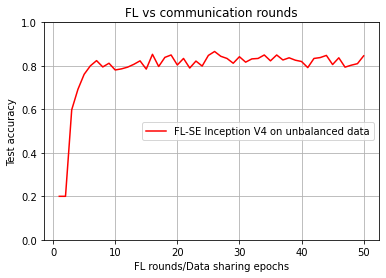

In [86]:
import matplotlib.pyplot as plt
plt.plot(range(1,len(acc3)+1),acc3,color='red',label='FL-SE Inception V4 on unbalanced data')
plt.title("FL vs communication rounds")
plt.grid(visible=True)
plt.legend(loc='right')
plt.ylim(0,1)
plt.xlabel("FL rounds/Data sharing epochs")
plt.ylabel("Test accuracy")

In [87]:
acccc=np.array(acc3)

In [88]:
np.save("acc_fl_unbalanced_SE Inception V4_50",acccc)

In [89]:
global_model.save("fl_unbalanced_SE Inception V4_50.h5")

In [90]:
!pip list

Package                       Version              Editable project location
----------------------------- -------------------- -------------------------------------------
absl-py                       1.3.0
accelerate                    0.21.0
aetos                         0.0.2
aiohttp                       3.8.4
aiosignal                     1.3.1
alabaster                     0.7.13
albumentations                1.3.1
antlr4-python3-runtime        4.9.3
appdirs                       1.4.4
apturl                        0.5.2
aquests                       0.29.11.4
argon2-cffi                   20.1.0
array-record                  0.2.0
astor                         0.8.1
astunparse                    1.6.3
async-generator               1.10
async-timeout                 4.0.2
atila                         0.11.0.11
attrs                         21.2.0
Automat                       0.8.0
axial-positional-embedding    0.2.1
Babel                         2.12.1
backcall                

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, GlobalAveragePooling2D, Dense, Reshape, MaxPooling2D, AveragePooling2D, concatenate, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import ConvLSTM2D
def Conv_2D_Block(x, model_width, kernel, strides=(1, 1), padding="same"):
    # 2D Convolutional Block with BatchNormalization
    x = tf.keras.layers.Conv2D(model_width, kernel, strides=strides, padding=padding, kernel_initializer="he_normal")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)

    return x
def Inception_Module_A(inputs, filterB1_1, filterB2_1, filterB2_2, filterB3_1, filterB3_2, filterB3_3, filterB4_1, i):
    # Inception Block i
    branch1x1 = Conv_2D_Block(inputs, filterB1_1, (1, 1))

    branch5x5 = Conv_2D_Block(inputs, filterB2_1, (1, 1))
    branch5x5 = Conv_2D_Block(branch5x5, filterB2_2, (5, 5))

    branch3x3dbl = Conv_2D_Block(inputs, filterB3_1, (1, 1))
    branch3x3dbl = Conv_2D_Block(branch3x3dbl, filterB3_2, (3, 3))
    branch3x3dbl = Conv_2D_Block(branch3x3dbl, filterB3_3, (3, 3))

    branch_pool = tf.keras.layers.AveragePooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(inputs)
    branch_pool = Conv_2D_Block(branch_pool, filterB4_1, (1, 1))

    out = tf.keras.layers.concatenate([branch1x1, branch5x5, branch3x3dbl, branch_pool], axis=-1, name='Inception_Block_A'+str(i))

    return out

def Inception_Module_B(inputs, filterB1_1, filterB2_1, filterB2_2, filterB3_1, filterB3_2, filterB3_3, filterB4_1, i):
    # Inception Block i
    branch1x1 = Conv_2D_Block(inputs, filterB1_1, (1, 1))

    branch7x7 = Conv_2D_Block(inputs, filterB2_1, (1, 1))
    branch7x7 = Conv_2D_Block(branch7x7, filterB2_2, (1, 7))
    branch7x7 = Conv_2D_Block(branch7x7, filterB2_2, (7, 1))

    branch7x7dbl = Conv_2D_Block(inputs, filterB3_1, 1)
    branch7x7dbl = Conv_2D_Block(branch7x7dbl, filterB3_2, (1, 7))
    branch7x7dbl = Conv_2D_Block(branch7x7dbl, filterB3_2, (7, 1))
    branch7x7dbl = Conv_2D_Block(branch7x7dbl, filterB3_3, (1, 7))
    branch7x7dbl = Conv_2D_Block(branch7x7dbl, filterB3_3, (7, 1))

    branch_pool = tf.keras.layers.AveragePooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(inputs)
    branch_pool = Conv_2D_Block(branch_pool, filterB4_1, (1, 1))

    out = tf.keras.layers.concatenate([branch1x1, branch7x7, branch7x7dbl, branch_pool], axis=-1, name='Inception_Block_B'+str(i))

    return out
def Inception_Module_C(inputs, filterB1_1, filterB2_1, filterB2_2, filterB3_1, filterB3_2, filterB3_3, filterB4_1, i):
    # Inception Block i
    branch1x1 = Conv_2D_Block(inputs, filterB1_1, (1, 1))

    branch3x3 = Conv_2D_Block(inputs, filterB2_1, (1, 1))
    branch3x3_2 = Conv_2D_Block(branch3x3, filterB2_2, (1, 3))
    branch3x3_3 = Conv_2D_Block(branch3x3, filterB2_2, (3, 1))

    branch3x3dbl = Conv_2D_Block(inputs, filterB3_1, (1, 1))
    branch3x3dbl = Conv_2D_Block(branch3x3dbl, filterB3_2, (1, 3))
    branch3x3dbl = Conv_2D_Block(branch3x3dbl, filterB3_2, (3, 1))
    branch3x3dbl_2 = Conv_2D_Block(branch3x3dbl, filterB3_3, (1, 3))
    branch3x3dbl_3 = Conv_2D_Block(branch3x3dbl, filterB3_3, (3, 1))

    branch_pool = tf.keras.layers.AveragePooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(inputs)
    branch_pool = Conv_2D_Block(branch_pool, filterB4_1, (1, 1))

    out = tf.keras.layers.concatenate([branch1x1, branch3x3_2, branch3x3_3, branch3x3dbl_2, branch3x3dbl_3, branch_pool], axis=-1, name='Inception_Block_C'+str(i))

    return out

def Reduction_Block_A(inputs, filterB1_1, filterB1_2, filterB2_1, filterB2_2, filterB2_3, i):
    # Reduction Block A (i)
    branch3x3 = Conv_2D_Block(inputs, filterB1_1, (1, 1))
    branch3x3 = Conv_2D_Block(branch3x3, filterB1_2, (3, 3), strides=(2, 2))

    branch3x3dbl = Conv_2D_Block(inputs, filterB2_1, (1, 1))
    branch3x3dbl = Conv_2D_Block(branch3x3dbl, filterB2_2, (3, 3))
    branch3x3dbl = Conv_2D_Block(branch3x3dbl, filterB2_3, (3, 3), strides=(2, 2))

    branch_pool = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(inputs)
    out = tf.keras.layers.concatenate([branch3x3, branch3x3dbl, branch_pool], axis=-1, name='Reduction_Block_'+str(i))

    return out

def Reduction_Block_B(inputs, filterB1_1, filterB1_2, filterB2_1, filterB2_2, filterB2_3, i):
    # Reduction Block B (i)
    branch3x3 = Conv_2D_Block(inputs, filterB1_1, (1, 1))
    branch3x3 = Conv_2D_Block(branch3x3, filterB1_2, (3, 3), strides=(2, 2))

    branch3x3dbl = Conv_2D_Block(inputs, filterB2_1, (1, 1))
    branch3x3dbl = Conv_2D_Block(branch3x3dbl, filterB2_2, (1, 7))
    branch3x3dbl = Conv_2D_Block(branch3x3dbl, filterB2_2, (7, 1))
    branch3x3dbl = Conv_2D_Block(branch3x3dbl, filterB2_3, (3, 3), strides=(2, 2))

    branch_pool = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(inputs)
    out = tf.keras.layers.concatenate([branch3x3, branch3x3dbl, branch_pool], axis=-1, name='Reduction_Block_'+str(i))

    return out
def SE_Block(inputs, num_filters, ratio):
    squeeze = tf.keras.layers.GlobalAveragePooling2D()(inputs)

    excitation = tf.keras.layers.Dense(units=num_filters/ratio)(squeeze)
    excitation = tf.keras.layers.Activation('relu')(excitation)
    excitation = tf.keras.layers.Dense(units=num_filters)(excitation)
    excitation = tf.keras.layers.Activation('sigmoid')(excitation)
    excitation = tf.keras.layers.Reshape([1, 1, num_filters])(excitation)

    scale = inputs * excitation

    return scale


In [4]:
class SEInception:
    def __init__(self, length, width, num_channel, num_filters, ratio=4, problem_type='Classification',
                 output_nums=5, pooling='avg', dropout_rate=False, auxilliary_outputs=False):
        # length: Input Signal Length
        # model_depth: Depth of the Model
        # model_width: Width of the Model
        # kernel_size: Kernel or Filter Size of the Input Convolutional Layer
        # num_channel: Number of Channels of the Input Predictor Signals
        # problem_type: Regression or Classification
        # output_nums: Number of Output Classes in Classification mode and output features in Regression mode
        # pooling: Choose either 'max' for MaxPooling or 'avg' for Averagepooling
        # dropout_rate: If turned on, some layers will be dropped out randomly based on the selected proportion
        # auxilliary_outputs: Two extra Auxullary outputs for the Inception models, acting like Deep Supervision
        self.length = length
        self.width = width
        self.num_channel = num_channel
        self.num_filters = num_filters
        self.ratio = ratio
        self.problem_type = problem_type
        self.output_nums = output_nums
        self.pooling = pooling
        self.dropout_rate = dropout_rate
        self.auxilliary_outputs = auxilliary_outputs

    def MLP(self, x):
        if self.pooling == 'avg':
            x = tf.keras.layers.GlobalAveragePooling2D()(x)
        elif self.pooling == 'max':
            x = tf.keras.layers.GlobalMaxPooling2D()(x)
        if self.dropout_rate:
            x = tf.keras.layers.Dropout(self.dropout_rate)(x)
        # Final Dense Outputting Layer for the outputs
        x = tf.keras.layers.Flatten()(x)
        outputs = tf.keras.layers.Dense(self.output_nums, activation='linear')(x)
        if self.problem_type == 'Classification':
            outputs = tf.keras.layers.Dense(self.output_nums, activation='softmax')(x)

        return outputs


    def SEInception_v4(self):
        inputs = tf.keras.Input((self.length, self.width, self.num_channel))  # The input tensor
        # Stem
        x = Conv_2D_Block(inputs, 32, 3, strides=2, padding='valid')
        x = Conv_2D_Block(x, 32, 3, padding='valid')
        x = Conv_2D_Block(x, 64, 3)

        branch1 = Conv_2D_Block(x, 96, 3, strides=2, padding='valid')
        branch2 = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)
        x = tf.keras.layers.concatenate([branch1, branch2], axis=-1)

        branch1 = Conv_2D_Block(x, 64, 1)
        branch1 = Conv_2D_Block(branch1, 96, 3, padding='valid')
        branch2 = Conv_2D_Block(x, 64, 1)
        branch2 = Conv_2D_Block(branch2, 64, 7)
        branch2 = Conv_2D_Block(branch2, 96, 3, padding='valid')
        x = tf.keras.layers.concatenate([branch1, branch2], axis=-1)

        branch1 = Conv_2D_Block(x, 192, 3, padding='valid')
        branch2 = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(1, 1))(x)
        x = tf.keras.layers.concatenate([branch1, branch2], axis=-1)

        # 4x Inception-A Blocks - 35 x 256
        for i in range(4):
            x = Inception_Module_A(x, 96, 64, 96, 64, 96, 96, 96, i)
            x = SE_Block(x, int(np.shape(x)[-1]), self.ratio)

        aux_output_0 = []
        if self.auxilliary_outputs:
            # Auxilliary Output 0
            aux_pool = tf.keras.layers.AveragePooling2D(pool_size=(5, 5), strides=(3, 3), padding='valid')(x)
            aux_conv = Conv_2D_Block(aux_pool, 96, 1)
            aux_output_0 = self.MLP(aux_conv)

        x = Reduction_Block_A(x, 64, 384, 192, 224, 256, 1)  # Reduction Block 1: 17 x 768

        # 7x Inception-B Blocks - 17 x 768
        for i in range(7):
            x = Inception_Module_B(x, 384, 192, 256, 192, 224, 256, 128, i)
            x = SE_Block(x, int(np.shape(x)[-1]), self.ratio)

        aux_output_1 = []
        if self.auxilliary_outputs:
            # Auxilliary Output 1
            aux_pool = tf.keras.layers.AveragePooling2D(pool_size=(5, 5), strides=(3, 3), padding='valid')(x)
            aux_conv = Conv_2D_Block(aux_pool, 128, 1)
            aux_output_1 = self.MLP(aux_conv)

        x = Reduction_Block_B(x, 192, 192, 256, 320, 320, 2)  # Reduction Block 2: 8 x 1280

        # 3x Inception-C Blocks: 8 x 2048
        for i in range(3):
            x = Inception_Module_C(x, 256, 384, 512, 384, 512, 512, 256, i)
            x = SE_Block(x, int(np.shape(x)[-1]), self.ratio)
        x = tf.expand_dims(x,axis = 1)
        x = ConvLSTM2D(filters=512, kernel_size=(1,1),padding = "same")(x)
        x = BatchNormalization(axis=3, momentum=0.0,epsilon=0.0001)(x)
        x = Activation('relu')(x)

        # Final Dense MLP Layer for the outputs
        final_output = self.MLP(x)
        # Create model.
        model = tf.keras.Model(inputs, final_output, name='Inception_v4')
        if self.auxilliary_outputs:
            model = tf.keras.layers.Model(inputs, outputs=[final_output, aux_output_0, aux_output_1], name='Inception_v4')

        return model

In [5]:
model1=SEInception(128,128,3,64)
global_model=model1.SEInception_v4()


2023-09-12 18:21:35.262472: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-12 18:21:36.220406: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38413 MB memory:  -> device: 0, name: A100-PCIE-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0


In [6]:
global_model.compile(
            loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy']
        )